In [39]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

In [40]:
%load_ext autoreload
%autoreload 1
%aimport aa

# Analysis of time distortion ratings
This notebook performes a quick activity level evaluation of joystick ratings of time distortion and button presses to a couple of stimuli from a larger project.

The select stimuli were:

    1) 07_Louange.wav: j07.csv, t07.csv
    2) 16_Fratres.wav: j16.csv. t16.csv 
 

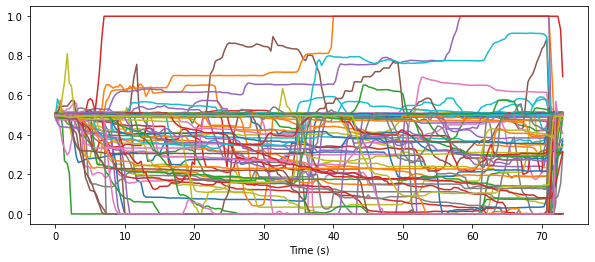

time,2,3,4,5,6,7,8,9,10,11,...,71,72,73,74,75,76,77,78,79,80
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0,0.504,0.501,0.506,0.495,0.512,0.500,0.503,0.495,0.498,0.495,...,0.499,0.508,0.504,0.505,0.508,0.497,0.499,0.499,0.506,0.497
0.3,0.505,0.545,0.503,0.496,0.504,0.501,0.504,0.496,0.493,0.496,...,0.498,0.508,0.500,0.504,0.506,0.504,0.497,0.501,0.495,0.497
0.7,0.504,0.530,0.478,0.498,0.501,0.500,0.505,0.495,0.505,0.495,...,0.499,0.507,0.501,0.503,0.504,0.506,0.499,0.502,0.502,0.496
1.0,0.504,0.529,0.478,0.498,0.501,0.490,0.505,0.493,0.507,0.495,...,0.499,0.506,0.505,0.503,0.504,0.508,0.490,0.501,0.503,0.493
1.3,0.504,0.510,0.476,0.499,0.499,0.491,0.518,0.494,0.508,0.495,...,0.498,0.505,0.505,0.503,0.504,0.509,0.485,0.501,0.508,0.492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71.7,0.505,0.496,0.225,0.504,0.504,0.502,0.520,0.080,0.500,0.502,...,0.502,0.508,0.396,0.506,0.112,0.324,0.017,0.000,0.507,0.489
72.0,0.505,0.500,0.267,0.504,0.504,0.503,0.506,0.080,0.500,0.503,...,0.503,0.508,0.395,0.505,0.156,0.328,0.401,0.570,0.506,0.492
72.3,0.505,0.501,0.290,0.504,0.504,0.503,0.506,0.088,0.500,0.503,...,0.505,0.508,0.450,0.506,0.200,0.349,0.502,0.501,0.507,0.493


In [113]:
files = os.listdir()
stretch = pd.read_csv('data/j07.csv',header=2,index_col='time').transpose()
stretch=stretch.drop([107,99,108,109,110],axis=1)
stretch.index=stretch.index.map(float)
stretch.index=stretch.index.rename('Time (s)')
stretch.plot(legend=False,figsize=(10,4))
plt.show()
stretch

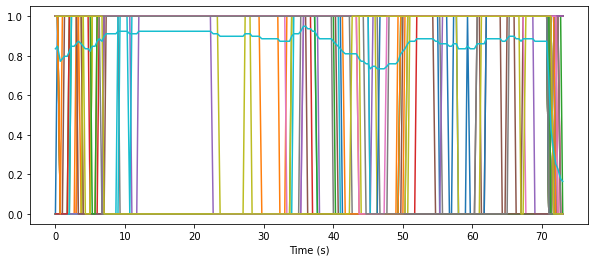

time,2,3,4,5,6,7,8,9,10,11,...,72,73,74,75,76,77,78,79,80,Total
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.835443
0.3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.848101
0.7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.772152
1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.784810
1.3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.797468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.316456
72.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.253165
72.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.227848


In [114]:
files = os.listdir()
press = pd.read_csv('data/t07.csv',header=2,index_col='time').transpose()
press=press.drop([107,99,108,109,110],axis=1)
press.index=press.index.map(float)
press.index=press.index.rename('Time (s)')
S=press.shape
press['Total'] = press.sum(1)/S[1]
press.plot(legend=False,figsize=(10,4))
plt.show()
press

Presumably these ratings were collected at 3Hz, an awkward choice for analysis with finite precision computation. To avoid the inconsistency resulting from digit rounding, hopsize must be fixed to integer seconds. 1s in this case.

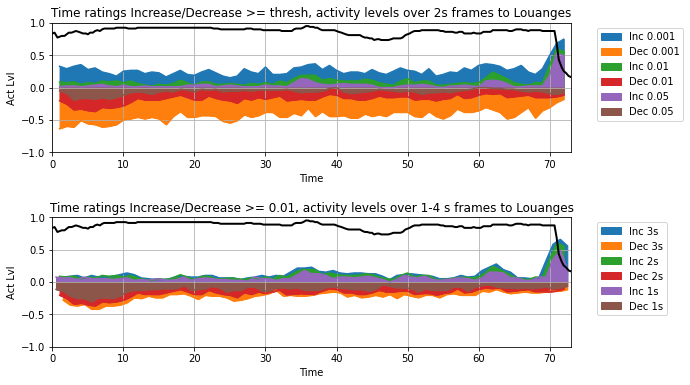

In [115]:
fig = plt.figure(figsize=(9,6))
left, width = 0.1, 0.8
bottom, height = 0.1, 0.3
spacing = 0.15

HopSize = 1 # seconds
thr = [0.001,0.01,0.05]
frm = [3,2,1]
stim = 'Louanges'
subp = 0
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for f in frm:
    FrameSize = f # seconds
    Thresh = thr[1]#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(f) + 's']=AC1['Total']
    AC['Dec'+' '+str(f) + 's']=-AC2['Total']
    AC.plot.area(ax=ax)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.plot(press['Total'],color='k',linewidth = 2)
plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= ' + str(Thresh)+ ', activity levels over 1-4 s frames to ' + stim)
plt.ylabel('Act Lvl')

subp +=1
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for t in thr:
    FrameSize = 2 # seconds
    Thresh = t#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(t)]=AC1['Total']
    AC['Dec'+' '+str(t)]=-AC2['Total']
    AC.plot.area(ax=ax)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.plot(press['Total'],color='k',linewidth = 2)
plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= thresh, activity levels over ' + str(FrameSize) + 's frames to ' + stim)
plt.ylabel('Act Lvl')
plt.savefig('figures/'+stim+'_timecours_aa.png',dpi = 400)


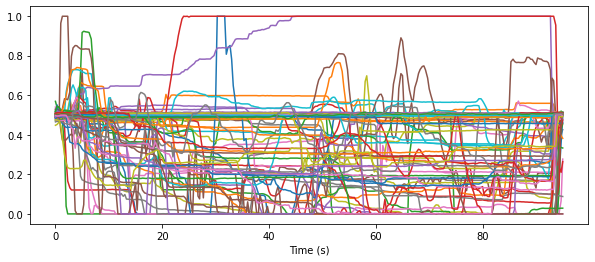

time,2,3,4,5,6,7,8,9,10,11,...,71,72,73,74,75,76,77,78,79,80
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0,0.498,0.489,0.506,0.504,0.530,0.490,0.486,0.485,0.489,0.502,...,0.497,0.506,0.505,0.505,0.509,0.490,0.499,0.497,0.465,0.476
0.3,0.500,0.492,0.503,0.502,0.526,0.493,0.487,0.485,0.486,0.502,...,0.496,0.506,0.504,0.501,0.511,0.495,0.500,0.495,0.468,0.475
0.7,0.497,0.493,0.503,0.504,0.527,0.493,0.487,0.485,0.499,0.502,...,0.497,0.506,0.505,0.502,0.512,0.495,0.500,0.496,0.467,0.472
1.0,0.497,0.490,0.503,0.503,0.525,0.493,0.488,0.485,0.520,0.502,...,0.497,0.507,0.507,0.505,0.512,0.494,0.501,0.499,0.467,0.446
1.3,0.496,0.497,0.503,0.503,0.521,0.492,0.488,0.485,0.506,0.499,...,0.497,0.506,0.524,0.507,0.513,0.495,0.502,0.499,0.465,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.7,0.498,0.504,0.505,0.508,0.505,0.506,0.497,0.186,0.465,0.497,...,0.499,0.458,0.461,0.503,0.365,0.418,0.001,0.506,0.506,0.343
94.0,0.498,0.501,0.504,0.507,0.506,0.504,0.497,0.218,0.505,0.498,...,0.500,0.457,0.502,0.502,0.415,0.498,0.127,0.502,0.506,0.446
94.3,0.500,0.501,0.504,0.504,0.505,0.504,0.497,0.342,0.505,0.498,...,0.503,0.458,0.506,0.502,0.436,0.500,0.279,0.503,0.506,0.493


In [116]:
files = os.listdir()
stretch = pd.read_csv('data/j16.csv',header=2,index_col='time').transpose()
stretch=stretch.drop([107,108,109,110],axis=1)
stretch.index=stretch.index.map(float)
stretch.index=stretch.index.rename('Time (s)')
stretch.plot(legend=False,figsize=(10,4))
plt.show()
stretch

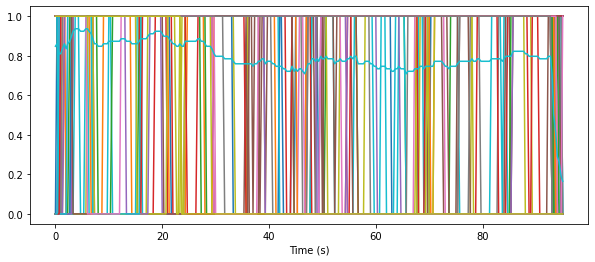

time,2,3,4,5,6,7,8,9,10,11,...,72,73,74,75,76,77,78,79,80,Total
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0,0,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0.848101
0.3,0,1,1,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0.860759
0.7,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0.810127
1.0,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0.810127
1.3,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.7,1,1,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,1,0,0,0.405063
94.0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0.291139
94.3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0.265823


In [117]:
files = os.listdir()
press = pd.read_csv('data/t16.csv',header=2,index_col='time').transpose()
press=press.drop([107,108,109,110],axis=1)
press.index=press.index.map(float)
press.index=press.index.rename('Time (s)')
S=press.shape
press['Total'] = press.sum(1)/S[1]
press.plot(legend=False,figsize=(10,4))
plt.show()
press

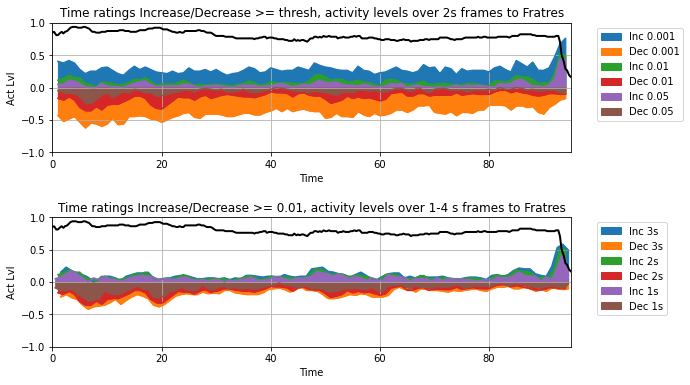

In [118]:
fig = plt.figure(figsize=(9,6))
left, width = 0.1, 0.8
bottom, height = 0.1, 0.3
spacing = 0.15

HopSize = 1 # seconds
thr = [0.001,0.01,0.05]
frm = [3,2,1]
stim = 'Fratres'
subp = 0
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for f in frm:
    FrameSize = f # seconds
    Thresh = thr[1]#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(f) + 's']=AC1['Total']
    AC['Dec'+' '+str(f) + 's']=-AC2['Total']
    AC.plot.area(ax=ax)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.plot(press['Total'],color='k',linewidth = 2)
plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= ' + str(Thresh)+ ', activity levels over 1-4 s frames to ' + stim)
plt.ylabel('Act Lvl')

subp +=1
ax= fig.add_axes([left,bottom+subp*(height+ spacing),width,height])
for t in thr:
    FrameSize = 2 # seconds
    Thresh = t#Treshes[feat] # minimum
    AC1 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Inc') 
    AC2 = aa.activityCount(stretch,FrameSize,HopSize,Thresh,'Dec')
    AC = pd.DataFrame()
    AC['Inc'+' '+str(t)]=AC1['Total']
    AC['Dec'+' '+str(t)]=-AC2['Total']
    AC.plot.area(ax=ax)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.plot(press['Total'],color='k',linewidth = 2)
plt.grid()
plt.ylim(-1,1)
plt.xlim(stretch.index[0],stretch.index[-1])
#plt.xlim(-15,15)
plt.title('Time ratings Increase/Decrease >= thresh, activity levels over ' + str(FrameSize) + 's frames to ' + stim)
plt.ylabel('Act Lvl')
plt.savefig('figures/'+stim+'_timecours_aa.png',dpi = 400)
